<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;"></td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<center>
<img src="https://media.discordapp.net/attachments/1126231743641428109/1138188172694650941/image.png?width=960&height=473">

    
## <center> QUANTUM SCHOLARS 2023


Autores: [Ricardo Quispe M.](https://github.com/RcrdPhysics).\, Tony Milla y Gustavo Valdivia
Institución: QuantumQuipu, Universidad Nacional Mayor de San Marcos\
Correo: ricardo.quispe5@unmsm.edu.pe, tony.milla@unmsm.edu.pe, gvaldiviamera@uh.edu
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/QuantumQuipu/QuantumScholars2023) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/@quantumquipu-unmsm1091/streams).*
    

Indicaciones:

1.- Este notebook deberá ser enviado a través del siguiente formulario: https://forms.gle/LRtmmhvZZ85Cuq5t9

2.- Fecha de entrega miércoles 16 de Agosto a las 18Hrs GMT-5

3.- Deberá adjuntar toda su solución en un solo notebook. (Ya sea cálculos a mano en formato imagen, o visualizaciones externas)

4.- Los problemas extra pueden reemplazar a cualquier problema dentro de la misma clase.



## Clase 1-2:

1.- ¿Cuál es el vector de estado de un sistema compuesto por 3 qubits , estando los qubits individuales(e independientes) en los estados  $|+\rangle $ , $|+\rangle $,$| -\rangle $,? Luego hacer las mediciones parciales para el qubit central, repetir lo mismo con qiskit.

2.- ¿Cuántos qubits independientes tiene como mínimo el siguiente sistema?

<center>
<img src="https://raw.githubusercontent.com/tonymilla/QuantumScholars2023/main/imagenes/examen/q_spherequestion.png">

3.- ¿Cómo se escribiría en notación de Dirac una compuerta CU3 desarrollalo e implementalo en qiskit para $\theta = \pi$, $\phi = \frac{\pi}{2}$ y $\lambda = \frac{7\pi}{2}$ 

## Respuesta a Pregunta 1:

El estado pedido en notaciòn de Dirac y base computacional se escribe así:    $$\ket{+,+,-} = \frac{1}{2\sqrt{2}} (\ket{000}-\ket{001}+\ket{010}-\ket{011}+\ket{100}-\ket{101}+\ket{110}-\ket{111})$$
Midiendo respecto al segundo espacio, al ser un estado equiprobable, el estado final es: $$\ket{+,-}=\frac{1}{2}(\ket{00}-\ket{01}+\ket{10}-\ket{11})$$ La realizaciòn de este cálculo usando Qiskit se coloca abajo:

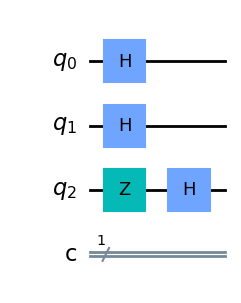

In [1]:
import numpy as np
from qiskit import *
circ=QuantumCircuit(3,1)
circ.h(0) #+ en 1
circ.h(1) #+ en 2
circ.z(2);circ.h(2) #- en 3
circ.draw(output="mpl")

In [2]:
circ.measure([1],0)
circ.draw(output="mpl")

backend = Aer.get_backend("statevector_simulator")

res1= execute(circ, backend=backend, shots=1).result(); print('State after first measurement:', res1.get_statevector() )

State after first measurement: Statevector([0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j,
             0. +0.j],
            dims=(2, 2, 2))


## Respuesta a Pregunta 2: 
Las posiciones de los puntos corresponden a latermedias en latitud que sugieren que la dimensiòn mínima del estado representado es 4. Esto puede comprobarse usando Qiskit generando el mismo estado:

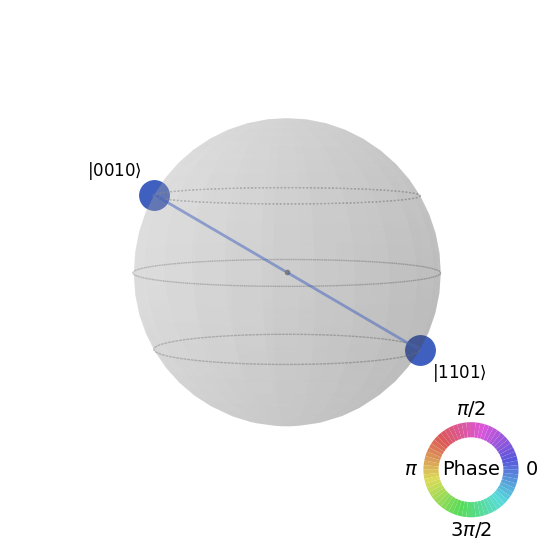

In [3]:
circ2=QuantumCircuit(4)
circ2.h(0)
circ2.cx(0,1)
circ2.cx(0,2)
circ2.cx(0,3)
circ2.x(1)
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
state = Statevector(circ2)
plot_state_qsphere(state)

## Respuesta a Pregunta 3:

El operador en notaciòn de Dirac es una matriz similar a una transformaciònnde coordenadasnesfèricas
$$ U_3(\theta,\phi,\lambda)=\begin{pmatrix} cos(\frac{\theta}{2}) & -e^{i\lambda}sin(\frac{\theta}{2}) \\ e^{i\phi}sin(\frac{\theta}{2}) & e^{i(\lambda+\phi} cos(\frac{\theta}{2})\end{pmatrix}$$


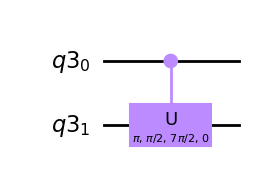

In [4]:
q3 = QuantumRegister(2)
circ3=QuantumCircuit(q3)
circ3.cu(np.pi, np.pi/2, 7*np.pi/2, 0, q3[0], q3[1])
circ3.draw(output="mpl")

## Clase 4-5

4.- A partir de la relación existente entre la operación (módulo 2) y el operador XOR ($\oplus$). Mostrar:

\begin{align}
\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n
\end{align}

5.- Implementa el código para la función oráculo balanceado con $n=3$, la cual retorna el circuito cuántico qc. Considere que $f(x)$ está dado por:

\begin{align}
f(001)&=0\\
f(000)&=0\\
f(111)&=0\\
f(110)&=0\\
f(011)&=1\\
f(010)&=1\\
f(100)&=1\\
f(101)&=1\\
\end{align}

6.- En la construcción más simple posible de un oráculo balanceado, se utiliza la compuerta $CX$, la cual toma como objetivo el $(n+1)$-ésimo qubit del circuito y como control cada uno de los $n$ primeros qubits. Sin embargo, ¿es realmente necesario aplicar $CX$ a todos los $n$ primeros qubits, o podríamos prescindir de algunos y obtener igualmente un oráculo balanceado?

7.- Implemente el algoritmo de Grover para determinar la máxima cantidad de aristas en un grafo de 5 nodos y 6 aristas:

\begin{align}
(0,3)\\
(0,4)\\
(1,3)\\
(1,4)\\
(2,3)\\
(2,4)\\
\end{align}

## Respuesta a Pregunta 4: 
La suma de términos en binario se define como $0=0+0=1+1$ y $1=0+1=1+0$. Esto coincide con el operador XOR para este caso particular, lo que demuestra lo solicitado.

## Respuesta a Pregunta 5
La tabla en el enunciado indica que para los valores indicados lo que define lo *balanceado* de la función es si los valores del primer y el segundo dígito son iguales o no (el valor de la función es 0 si son iguales y 1 si no). Esto coincide con aplicar el operador XOR a esos mismos dígitos. Ocupando la conversión a operadores cuánticos mostrado en su cuaderno respecto la operación necesaria es:
$$ \ket{x_1,x_2,x_3,y} \rightarrow \ket{x_1,x_2,x_3,y\oplus x_1 \oplus x_2}$$

Esto se puede hacer aplicando operadores CNOT entre los qubit 1 y 4 y los qubit 2 y 4. Esto se demostrará usando Qiskit y probándolo para 2 combinaciones lineales de estados de acuerdo a tabla.

In [5]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.measure(qreg_q[3], creg_c[3])


editor = CircuitComposer(circuit=circuit)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fe7e0859870>)

Los 2 primeros operadores definen un operador que consiste en el estado $\frac{1}{\sqrt{2}}(\ket{00}+\ket{11}$. Para este estado, el oráculo siempre dará f(x)=0. Si se añade un operador $X$ antes del oráculo, la medición se convierte en 1. 

## Respuesta a Pregunta 6
En la pregunta anterior se evidencia un oráculo para algoritmo de Deutch-Jozsa que cumple con lo solicitado. No fue necesario aplicar operadores CNOT en todos los qubit del espacio para generarlo, sino para solo 2. Y el oráculo seguirá siendo válido con los mismos 2 operadores CNOT si se expande el espacio más allá (por ejemplo, haciendo tablas con números de 4 cifras binarias). Con que se mantenga la condición del primer y segundo dígito se puede hacer una función balanceada.

## Respuesta a Pregunta 7
Tomando la construcción hecha para el cuaderno de Algoritmo de Grover para una red de 4 nodos, se puede hacer lo mismo para la red de nodos entregada. A continuación, el desarrollo en Qiskit debidamente comentado.

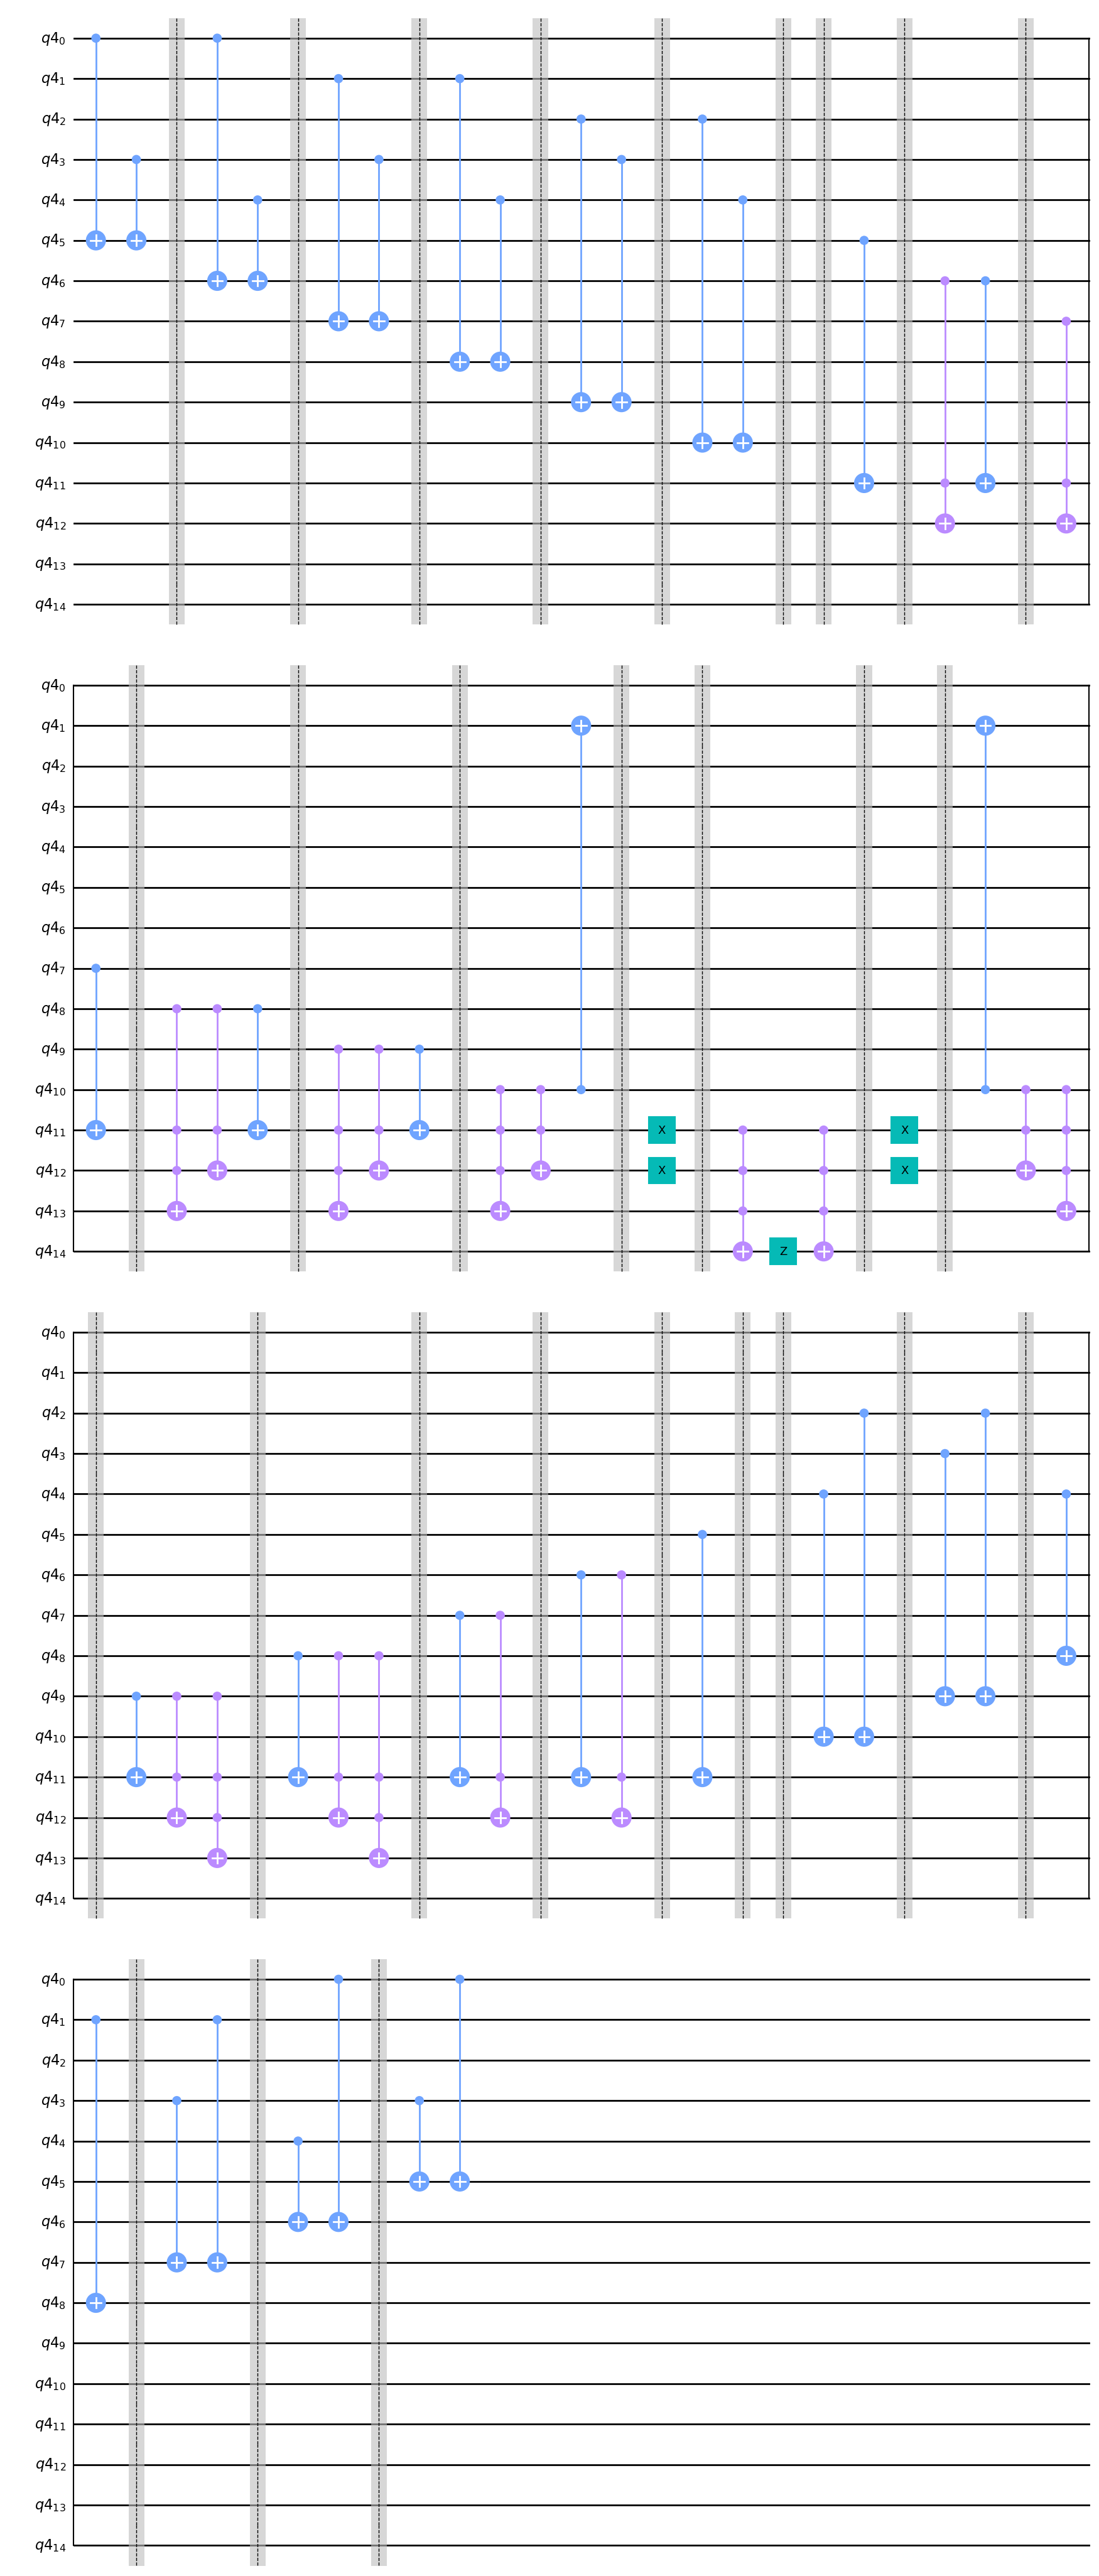

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import XGate,ZGate
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
def oracle_part(qc,qr):
    mcx = XGate().control(3)

    #Los qubits del 0 al 4 son los nodos.
    #Los qubits del 5 al 10 nos permiten reconocer si la arista es correcta
    #(i.e. si se da entre nodos de distinto color).
    qc.cx(qr[0], qr[5])
    qc.cx(qr[3], qr[5])
    qc.barrier()
    qc.cx(qr[0], qr[6])
    qc.cx(qr[4], qr[6])
    qc.barrier()
    qc.cx(qr[1], qr[7])
    qc.cx(qr[3], qr[7])
    qc.barrier()
    qc.cx(qr[1], qr[8])
    qc.cx(qr[4], qr[8])
    qc.barrier()
    qc.cx(qr[2], qr[9])
    qc.cx(qr[3], qr[9])
    qc.barrier()
    qc.cx(qr[2], qr[10])
    qc.cx(qr[4], qr[10])
    qc.barrier()
    
    #Los qubits del 11 al 13 nos van a permitir contar la cantidad de aristas correctas
    #de tal forma que la suma será expresada en binario con cifras dadas por q_11, q_10 y q_9.
    qc.barrier()    
    qc.cx(qr[5],qr[11])
    qc.barrier()
    
    qc.ccx(qr[6], qr[11], qr[12])
    qc.cx(qr[6],qr[11])
    qc.barrier()
    
    qc.ccx(qr[7], qr[11], qr[12])
    qc.cx(qr[7],qr[11])
    qc.barrier()
    
    qc.append(mcx,[8,11,12,13])
    qc.ccx(qr[8], qr[11], qr[12])
    qc.cx(qr[8],qr[11])
    qc.barrier()
    
    qc.append(mcx,[9,11,12,13])
    qc.ccx(qr[9], qr[11], qr[12])
    qc.cx(qr[9],qr[11])
    qc.barrier()
    
    qc.append(mcx,[10,11,12,13])
    qc.ccx(qr[10], qr[11], qr[12])
    qc.cx(qr[10],qr[1])
    qc.barrier()
    
    qc.x(qr[11])
    qc.x(qr[12])
    qc.barrier()
    
    #El qubit 14 indicará cuando se haya encontrado un estado deseado
    qc.append(mcx,[11,12,13,14])
    
    return qc

def oracle(qc,qr):
    
    qc=oracle_part(qc,qr)
    qc1=qc.inverse()
    qc.z(14)
    qc.compose(qc1,inplace=True)
    
    return qc
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)
oracle(qc,qr).draw(output="mpl")



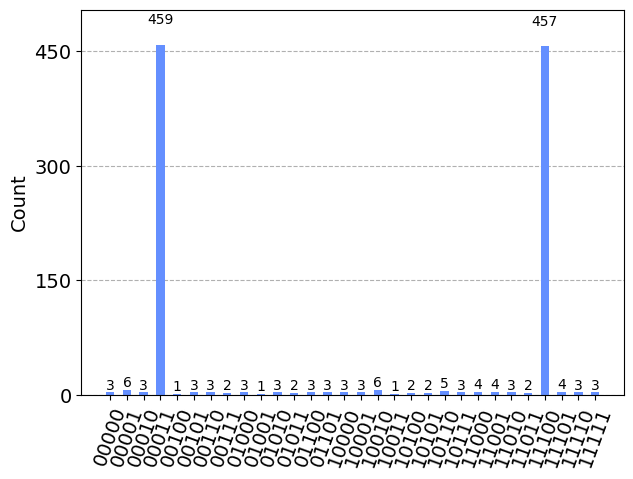

In [7]:
def grover_diffusion(qc,qr):
    mcz = ZGate().control(4)
    
    qc.barrier()
    qc.h(range(5))
    qc.x(range(5))
    qc.append(mcz,list(range(0,5)))
    qc.x(range(5))
    qc.h(range(5))
    qc.barrier()
    return qc

def grover(qc,qr):
    return grover_diffusion(oracle(qc,qr),qr)

qr=QuantumRegister(15)
qc=QuantumCircuit(qr)

qra=QuantumRegister(15)
cra=ClassicalRegister(5)
qa=QuantumCircuit(qra,cra)

qa.h(range(5))
qb=grover(qc,qr)
qa.compose(qb.compose(qb),inplace=True)

qa.measure(range(5),cra)

qasm_simulator = Aer.get_backend('qasm_simulator')

job = execute(qa, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qa)

plot_histogram(counts)

Esto permite concluir que los estados seleccionados son $\ket{00011}$ (un color para los nodos 0,1 y 2 y otro para el 3 y 4) y $\ket{11100}$ (lo mismo).

8.- En el algoritmo de Grover, determine el número de veces que debe ejercutarse el par $U_\omega U_f$ para que el estado final de nuestro circuito coincida con el Ket de estados deseados sabiendo que $x\in\{0,1\}^5$ y hay 4 estados que sastifacen las características de búsqueda.

Extra 1.- Si

\begin{align}
\ket{\psi3}&=U\omega\ket{\psi_2}\
&=\left(2\ket{s}\bra{s}-\mathbb{I}\right)\left(-\sqrt{\frac{a}{2^n}}\ket{A}+\sqrt{\frac{b}{2^n}}\ket{B}\right)
\end{align}

Usando
\begin{align}
\ket{s}\bra{s}=\frac{a}{2^n}\ket{A}\bra{A}+\frac{b}{2^n}\ket{B}\bra{B}+\frac{\sqrt{ab}}{2^n}\left[\ket{A}\bra{B}+\ket{B}\bra{A}\right]
\end{align}
\begin{align}
&\sin\theta=\sqrt{\frac{a}{2^n}}\
&\cos\theta=\sqrt{\frac{b}{2^n}}
\end{align}

Demuestre:
\begin{align}
\ket{\psi_3}=\sin 3\theta\ket{A}+\cos 3\theta\ket{B}
\end{align}

## Respuesta a Pregunta 8
El enunciado indica que el espacio en que se aplica el Algoritmo de Grover es $n=5$. Y los 4 estados deseados definen $a=4$. Aplicando en la fórmula definida en el cuaderno de Algoritmo de Grover, el número $k$ de veces necesario de iterar el algoritmo es: 
$$ k \simeq \frac{\pi}{4} \sqrt{\frac{2^n}{a}} = \frac{\pi}{4} \sqrt{\frac{2^5}{4}}= \frac{\pi}{4} \sqrt{8}\simeq 2.221$$

## Respuesta a Extra 1
La siguiente derivación aplica las identidades trigonométicas de suma del seno y coseno:
$$ sin(a+b)=sin(a)cos(b)+cos(a)sin(b) $$
$$ cos(a+b)=cos(a)cos(b)-sin(a)sin(b) $$
Aplicando en la definición de estado $\ket{\psi_3}$ la definición de funciones trigonométricas dada en el enunciado:
$$ \ket{psi_3}=(2\ket{s}\bra{s}+\mathbb{I})(-sin\theta\ket{A}+cos\theta\ket{B}) $$
$$ = \begin{pmatrix} 2sin^2 \theta -1 & 2cos\theta sin\theta \\ 2cos\theta sin\theta & 2cos^2\theta-1 \end{pmatrix} \begin{pmatrix} -sin\theta \\ cos\theta \end{pmatrix}$$

Desde ahora, se escribe lo obtenido en formato matricial, usando como base $\{\ket{A},\ket{B}\}$. Usando teorema de Pitágoras:

$$ 2sin^2 \theta -1 =2sin^2 \theta-sin^2\theta-cos^2\theta=sin^2\theta-cos^2\theta$$
$$ 2cos^2 \theta -1 =2cos^2 \theta-sin^2\theta-cos^2\theta=cos^2\theta-sin^2\theta$$

Ocupando las identidades del principio de la respuesta, se puede reescribir la ecuación:
$$ \begin{pmatrix} -cos 2\theta & sin 2\theta \\ sin 2\theta & cos 2\theta \end{pmatrix} \begin{pmatrix} -sin\theta \\ cos\theta \end{pmatrix} = \begin{pmatrix} sin\theta cos 2\theta + cos\theta sin 2\theta \\ -sin\theta sin 2\theta + cos\theta cos 2\theta \end{pmatrix} = \begin{pmatrix} sin 3\theta \\ cos 3\theta \end{pmatrix} $$

## Clase 6:

9.- La implementación de QFT se probó preparando el estado de Fourier $|\widetilde{5}\rangle$ para el cual $\text{QFT}^{\dagger}|\widetilde{5}\rangle= |101\rangle$. Intenta encontrar el estado $|a\rangle$ tal que $\text{QFT}^{\dagger}|a\rangle = |100\rangle$.

10.- Encuentra el estado $|b\rangle$ tal que $\text{QFT}^{\dagger}|b\rangle = |011\rangle$.

Extra 3. Intente escribir la función QFT sin recursividad. Utilice el simulador unitario de Qiskit para verificar sus resultados.

## Respuesta a Pregunta 9:
Retomando el procedimiento hecho en el cuaderno respectivo, se puede sacar la QFT inversa para los estados pedidos y con ello obtener las soluciones. A continuación, el resultado usando Qiskit:


In [8]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import array_to_latex
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

Usando la misma notación: $\ket{\tilde{4}}$ (usando que $4=100$ en binario). Entonces, para el caso particular: 

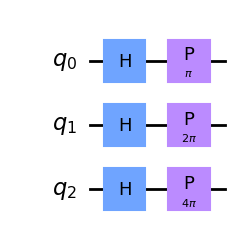

In [9]:
nqubits = 3
number = 4
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw()

In [10]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
print('Vector inverso de 4:', statevector)

Vector inverso de 4: Statevector([ 0.35355339+0.00000000e+00j, -0.35355339+4.32978028e-17j,
              0.35355339-8.65956056e-17j, -0.35355339+1.29893408e-16j,
              0.35355339-1.73191211e-16j, -0.35355339+2.16489014e-16j,
              0.35355339-2.59786817e-16j, -0.35355339+3.03084620e-16j],
            dims=(2, 2, 2))


Esto se puede comprobar calculando la QFT para el estado obtenido: 

/tmp/ipykernel_1152/1998507627.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibmq_quito
Job Status: job has successfully run


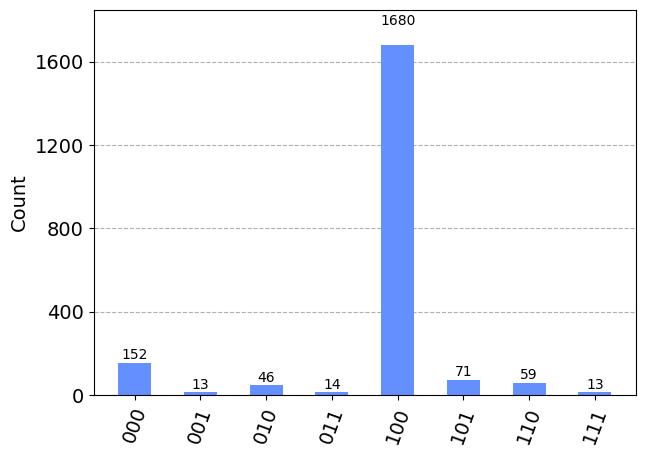

In [11]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)
counts = job.result().get_counts()
plot_histogram(counts)

## Respuesta a Pregunta 10:
Ocupando el procedimiento de la pregunta anterior (y que $011=3$ en binario): 

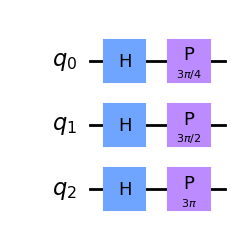

In [12]:
nqubits = 3
number = 3
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw()

In [13]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
print('Vector inverso de 3:', statevector )

Vector inverso de 3: Statevector([ 3.53553391e-01+0.00000000e+00j,
             -2.50000000e-01+2.50000000e-01j,
             -6.49467042e-17-3.53553391e-01j,
              2.50000000e-01+2.50000000e-01j,
             -3.53553391e-01+1.29893408e-16j,
              2.50000000e-01-2.50000000e-01j,
              1.94840113e-16+3.53553391e-01j,
             -2.50000000e-01-2.50000000e-01j],
            dims=(2, 2, 2))


Esto se puede comprobar aplicando la QFT al estado obtenido: 


ibmqfactory.load_account:WARNING:2023-08-16 16:15:08,085: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_jakarta
Job Status: job has successfully run


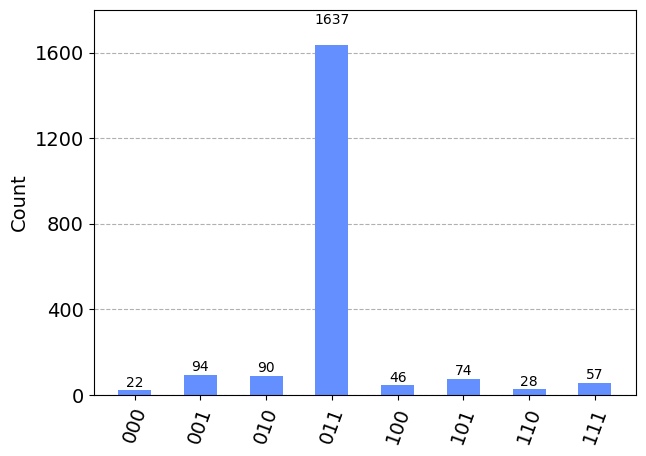

In [14]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)
counts = job.result().get_counts()
plot_histogram(counts)

## 5. Recursos útiles

* Los notebooks y sus referencias.

## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>